# GA 1.6: An ODE to Probably Doing Enough (PDE)

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.6. For: 11 October, 2024.*

# Overview

This assignment contains two parts: treating non-linear ODEs and treating the diffusion equation (PDE).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

## Part 1: Solving Non-linear ODEs

In task 1 you will solve first a very simple equation using Newton-Rhapson to understand exactly how to implement it. Task 2 treats the solution of a non-linear ODE w.r.t. time, first with Explicit Euler and then with Implicit Euler. The latter will require again Newton-Rhapson to find the solution. 

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1</b>

The equation to solve using Newton-Rhapson is

$$
x^2=9
$$
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1</b>

Formally Newton-Rhapson is implemented iterating the solution as follows:
$$
z_{j+1} = z_{j} - g(z_j)/g'(z_j)
$$
where $g(z_j) = 0$ and $z_j$ is a guess and $z_{j+1}$ is the improved guess.

As we do not care about retaining the values of every guess, it can be written in code as:

$$
x = x - g(x)/g'(x)
$$

**Transform the equation $x^2=9$ to g(x) and write it below, together with g'(x).** 

</p>
</div>

Write your answer here.


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

$$
g(x) = x^2-9 \text{ and } g'(x) = 2x
$$

so
$$
x = x - \frac{x^2-9}{2x}
$$
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2</b>

Implement your equations $g(x)$ and $g'(x)$ in the code below, as well as the Newton-Rhapson expression inside the loop. Test the code with the initial guess of $x=10$. 
</p>
</div>

In [2]:
# def g(x):
#     return YOUR_CODE_HERE

# def g_der(x):
#     return YOUR_CODE_HERE

# x = YOUR_CODE_HERE
# for j in range(100):
#     x = YOUR_CODE_HERE
#     # Next task will go here

# SOLUTION

def g(x):
    return x**2 - 9

def g_der(x):
    return 2*x

x = 10
for j in range(100):
    x = x - g(x)/g_der(x)
    if np.abs(g(x)) < 1e-6:
        break
    
print("The solution found is ", x, " it took " ,j , " iterations to converge.")

x = .01
for j in range(100):
    x = x - g(x)/g_der(x)
    if np.abs(g(x)) < 1e-6:
        break
    
print("The solution found is ", x, " it took " ,j , " iterations to converge.")

The solution found is  3.0000000149658455  it took  4  iterations to converge.
The solution found is  3.000000000008298  it took  11  iterations to converge.


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3</b>

The code is taking 100 iterations without stopping. **Add a condition to the code above to stop the loop once the solution is good enough**, i.e., when the solution is closer than $\epsilon = 10^{-6}$ to the exact solution. How many iterations does it take now to converge? 

</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

4 iterations 

</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.4</b>

Change the intial guess to  $x=0.01$, which is closer to the exact solution than the initial guess in the previous task. How many iterations does it take to converge? Explain the difference.

</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

It takes 11 iterations, 7 more than in the previous case despite the guess being closer to the solution. This is becaTe at that location the derivative is close to 0 and if first goes far away from the solution.

</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2</b>

Solve the following ODE using Explicit and Implicit Euler.

$$
\frac{dy}{dt} = \sin(y^3)+\sin(t)
$$

with initial value $y(t=0) = 1$


</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.1</b>

Write in paper the Explicit and Implicit Euler schemes of the equation above.


</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

The Explicit Euler Scheme:
$$
y_{i+1} = y_{i} + \Delta t (\sin(y_i^3)+\sin(t_i))
$$

The Implicit Euler scheme:
$$
y_{i+1} = y_{i} + \Delta t (\sin(y_{i+1}^3)+\sin(t_{i+1}))
$$

</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.2</b>

Just as before, Newton-Rhapson must be implemented following:
$$
z_{j+1} = z_{j} - g(z_j)/g'(z_j)
$$
where $g(z_j) = 0$ and $z_j$ is a guess and $z_{j+1}$ is the improved guess.

**Transform your Implicit Euler scheme into g(*) and write it below, together with g'(*).** 

</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

$$
g(y_{i+1}) = y_{i+1}-y_{i} - \Delta t (\sin(y_{i+1}^3)+\sin(t_{i+1}))
$$

and

$$
g'(y_{i+1}) = 1 - 3\Delta ty_{i+1}^2\cos(y_{i+1}^3)
$$

</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2.3</b>

Implement the Explicit Euler and Implicit Euler schemes by filling the lines of code below:

- a) Code the functions g() and g'() 
- b) Implement Explicit Euler
- c) Implement Implicit Euler. Tip: use as initial guess the value of the previous time step.
- d) Use a dt = 0.25s

</p>
</div>

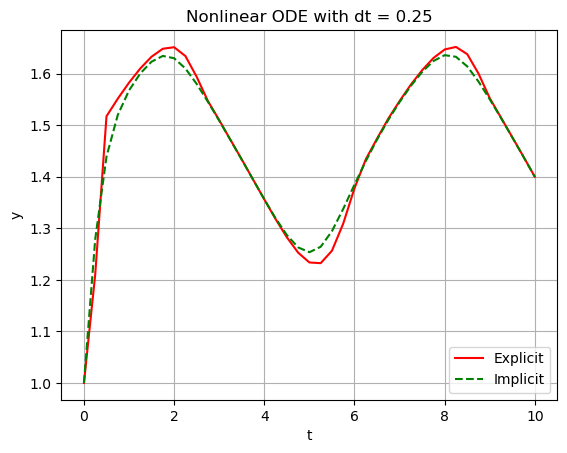

In [3]:
# def g(y_iplus1, y_i, t_iplus1):
#     return YOUR_CODE_HERE

# def g_der(y_iplus1):
#     return YOUR_CODE_HERE


# # Define parameters:
# dt = .25
# t_end = 10
# t = np.arange(0,t_end+dt,dt)

# y_EE = np.zeros(t.shape)
# y_IE = np.zeros(t.shape)

# # Define Initial Conditions
# y_EE[0] = YOUR_CODE_HERE
# y_IE[0] = YOUR_CODE_HERE

# # Perform time-integration
# newtonFailed = 0
# for i in range(0, len(t)-1):    
    
#     # Forward Euler:
#     y_EE[i+1] = YOUR_CODE_HERE

#     # Backward Euler:
#     y_IE[i+1] = YOUR_CODE_HERE # Initial guess
#     for j in range(200):
#         y_IE[i+1] = YOUR_CODE_HERE
#         if np.abs(g(y_IE[i+1], y_IE[i], t[i+1])) < 1e-6:
#             break
        
#     if j >= 199:
#         newtonFailed = 1
    

# # Plotting the solution
# plt.plot(t, y_EE, 'r', t, y_IE, 'g--')
# if newtonFailed:
#     plt.title('Nonlinear ODE with dt = ' + str(dt) + ' \nImplicit Euler did not converge')
# else:
#     plt.title('Nonlinear ODE with dt = ' + str(dt))

# plt.xlabel('t')
# plt.ylabel('y')
# plt.gca().legend(('Explicit','Implicit'))
# plt.grid()
# plt.show()


# SOLUTION
def g(y_iplus1,y_i, t_iplus1):
    return y_iplus1-y_i-dt*(np.sin(y_iplus1**3)+np.sin(t_iplus1))

def g_der(y_iplus1):
    return 1-3*dt*y_iplus1**2*np.cos(y_iplus1**3)


# Define parameters:
dt = .25
t_end = 10
t = np.arange(0,t_end+dt,dt)

y_EE = np.zeros(t.shape)
y_IE = np.zeros(t.shape)

# Define Initial Conditions
y_EE[0] = 1
y_IE[0] = 1

# Perform time-integration
newtonFailed = 0
for i in range(0, len(t)-1):    
    
    # Forward Euler:
    y_EE[i+1] = y_EE[i] + dt*(np.sin(y_EE[i]**3)+np.sin(t[i]))

    # Backward Euler:
    y_IE[i+1] = y_IE[i] # initial guess
    for j in range(200):
        y_IE[i+1] = y_IE[i+1] - g(y_IE[i+1], y_IE[i], t[i+1]) / g_der(y_IE[i+1])
        if np.abs(g(y_IE[i+1], y_IE[i], t[i+1])) < 1e-6:
            break
        
    if j >= 199:
        newtonFailed = 1
    

# Plotting the solution
plt.plot(t, y_EE, 'r', t, y_IE, 'g--')
if newtonFailed:
    plt.title('Nonlinear ODE with dt = ' + str(dt) + ' \nImplicit Euler did not converge')
else:
    plt.title('Nonlinear ODE with dt = ' + str(dt))

plt.xlabel('t')
plt.ylabel('y')
plt.gca().legend(('Explicit','Implicit'))
plt.grid()
plt.show()

## Part 2: Diffusion Equation in 1D

The 1-D diffusion equation reads $$\frac{\partial u}{\partial t}=v\frac{\partial^2 u}{\partial x^2}$$
 
where $u$ is a continuous function in space and time, $v$ is a constant and often referred to as the **diffusivity coefficient**, giving rise to the name 'diffusion equation'. This is a Partial Differential Equation of which the independent variable, $u$, varies on space and time. This equation is present across all fields of civil engineering and the applied sciences. Here, we use it to represent the temperature on a rod (see the sketch below).

Unlike the problem of Wednesday, here there is no exchange of heat with the ambient air and the temperature evolves in time. The temperature initially is uniform along the rod, equal to $7°C$. Then it is heated at both ends with the temperatures shown in the figure. 

![Thermal Gradient](./figures/thermal_gradient.png)

The problem is schematized as a one-dimensional $0.3 m$ steel rod of with a diffusivity coefficient of $4e-6 m^2/s$. Run the simulation for $10,000 s$ to see the progression of the temperature through the model. Start with $200$ time steps and use 15 points to represent the rod.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3</b>

Solve the diffusion equation using Central Differences in space and Forward Differences in time. You will do this step by step in the following sub-tasks.

For convenience we write here the diffusion equation with the temperature variable:

$$
\frac{\partial T}{\partial t}=v\frac{\partial^2 T}{\partial x^2}
$$



</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>

How many constraints are needed in the 1D diffusion equation to have a well-posed problem?
</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

One initial condition and two boundary conditions are needed.

</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>

Draw a grid of 6 points with subindexes. Although your actual grid will be much larger, 6 points are enough to visualize the procedure. The initial condition states that the temperature of the rod is $7^o$ C. Does that mean that one single point of your grid is initialized or all of them? 


</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

\begin{array}{|c|c|c|c|c|c|c|}
T_0^{j} & T_1^{j} & T_2^{j} & T_3^{j} & T_4^{j} & T_5^{j} \\
\end{array}


</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.3:</b>

Now, the differential equation needs to be expressed in algebraic form using central differences in space AND forward differences in time. **Start by just transforming the PDE into a first-order ODE by ONLY applying Central Differences to the spatial derivative term.**


</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

$$ 
\frac{\partial T}{\partial t}\bigg|_i = \nu \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}
$$

</p>
</div>

Write your answer here.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.4:</b>

Before applying Forward Differences in time to the equation. You need to add a superscript to the notation that indicates the time step: $T^j_i$. So, $i$ indicates the spatial location and $j$ the time location. For example, $T^0_2$ indicates the temperature at the node $i=2$ and at the initial moment $j=0 (t=0)$. 

***Hint***: To express in a general form node $i$ at the next time step, you can write $T^{j+1}_i$. 

**Apply Forward Differences to the equation to obtain an algebraic expression.**
</p>
</div>


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

$$ 
T^{j+1}_{i} = T^j_i + \frac{\nu \Delta t}{\Delta x^2} \left(T^j_{i+1}-2T^j_i+T^j_{i-1}\right)
$$

</p>
</div>

Write your answer here.


<div style="background-color:#facb8E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>NOTE</b>

If you have doubts of your solution, <b>stop</b> and ask a staff member! It is important to be on the right track!!

</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.5:</b>   

Finally, some coding! Let's start with defining the parameters and creating the grid. **Fill in the missing parts of the code.**

</p>
</div>

In [4]:
# # Initial conditions

# T_left = YOUR_CODE_HERE # Temperature at left boundary
# T_right = YOUR_CODE_HERE # Temperature at right boundary
# T_initial = YOUR_CODE_HERE # Initial temperature

# length = YOUR_CODE_HERE # Length of the rod
# nu = YOUR_CODE_HERE # Thermal diffusivity

# dx = YOUR_CODE_HERE # spatial step size
# x = YOUR_CODE_HERE # spatial grid

# dt = YOUR_CODE_HERE # time step size

# Solution
T_left = 38
T_right = 25
T_initial = 7
L = 0.3
nu = 4/1000/1000

dx = 0.02
x = np.arange(0,L,dx)
n = len(x)
dt = 50
m = 200

Let's initialise the system with the initial and boundary conditions. Say $t_0 =0$.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.6:</b>   

Define the initial conditions and the boundary conditions. **Fill in the missing parts of the code.**

We define a 2-dimensional Numpy array <code>T</code> where the first index, <code>j</code>, represents time and the second index, <code>i</code>, represents space, for example: <code>T[j, i]</code>. Initialize <code>T</code> with a matrix of zeros.

</p>
</div>

In [5]:
# T = YOUR_CODE_HERE
# T[0, :] = YOUR_CODE_HERE
# T[:, 0] = YOUR_CODE_HERE
# T[:, -1] = YOUR_CODE_HERE
# b = YOUR_CODE_HERE

# SOLUTION
T = np.zeros((m,n))
T[0, :] = T_initial
T[:, 0] = T_left
T[:, -1] = T_right
b = T[j, 1:-1] + nu*dt/(dx**2)*(T[j, 2:]-2*T[j, 1:-1]+T[j, :-2])

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.7:</b>   

Write in paper the equations that come out from your algebraic representation of the diffusion equation, solving for the unknowns. Use it then to write the matrix A, the unknown vector T and vector b. As in the workshop and textbook, the <code>A</code> matrix consists only of the unknowns in the problem.

</p>
</div>

Your answer here.


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

Answer

</p>
</div>

In [6]:
# # Note: you may want to use extra lines, depending on
# # how you define your A, T and b arrays
# for j in range(m-1):
#     A = YOUR_CODE_HERE
#     b = YOUR_CODE_HERE
#     T[j+1,1:-1] = YOUR_CODE_HERE

# SOLUTION
for j in range(m-1):
    A = np.zeros((len(x)-2,len(x)-2))
    np.fill_diagonal(A, 1)
    b = T[j,1:-1] + nu*dt/(dx**2)*(T[j,2:]-2*T[j,1:-1]+T[j,:-2])    
    T_1_to_n_minus1 = np.linalg.inv(A) @ b
    T[j+1,1:-1] = T_1_to_n_minus1

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.8:</b>   

Use this code cell if you would like to verify your numerical implementation. For example, to visualize the temperature profile at different time steps.

</p>
</div>

In [7]:
def plot_T(T):
    '''
    Function to plot the temperature profile at different time steps.
    '''
    def plot_temperature(time_step):
        plt.plot(x, T[time_step, :])
        plt.xlabel('x [m]')
        plt.ylabel('T [°C]')
        plt.title(f'Temperature profile at time step {time_step}')
        plt.grid()
        plt.ylim(5, 40)
        plt.show()

    interact(plot_temperature, time_step=widgets.Play(min=0, max=len(T)-1, step=3, value=0))


<div style="background-color:#facb8E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>NOTE</b>

The widget may create multiple views of the same graph on some computers. We are still working on finding out why.

</p>
</div>

In [8]:
plot_T(T)

interactive(children=(Play(value=0, description='time_step', max=199, step=3), Output()), _dom_classes=('widge…

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.9:</b>   

Describe the time evolution of the temperature along the rod. Does the temperature reach a steady-state? What does that mean for heat flow?

Write your answer in the following markdown cell. 
</p>
</div>

Your answer here.

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>   

Your plots should show at the beginning temperatures of $38^oC$ and $25^oC$ at the edges and $7^oC$ elsewhere. As time progresses, you can notice how the temperature increases through the rod and eventually becomes a constant gradient across the length of the rod, indicating a steady-state.
  
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4</b>

Alter the right boundary condition, with the following equation: 


$$
u^t_{x=L} = 25 + 10 \sin \left(\frac{2\pi t}{period}\right)
$$

where L refers to the last point of the rod. Put your whole code together in a single cell. Copy the code cells from task 3.5 until task 3.8. Modify the right boundary condition as stated above, the period is 6000 seconds.


</p>
</div>

In [9]:
# YOUR_CODE_HERE

# SOLUTION
T_left = 38
T_right = 25
T_initial = 7
L = 0.3
nu = 4/1000/1000

dx = 0.02
x = np.arange(0,L,dx)
n = len(x)
dt = 50
m = 200

period = 6000
T = np.zeros((m,n))
T[0,:] = T_initial
T[:,0] = T_left
t = np.arange(0,m*dt,dt)
T[:,-1] = 25 + 10*np.sin(2*np.pi*t/period)


for j in range(m-1):
    # Building matrix A
    A = np.zeros((len(x)-2,len(x)-2))
    np.fill_diagonal(A, 1)
    # Building vector b
    b = T[j,1:-1] + nu*dt/(dx**2)*(T[j,2:]-2*T[j,1:-1]+T[j,:-2])    
    T_1_to_n_minus1 = np.linalg.inv(A) @ b
    T[j+1,1:-1] = T_1_to_n_minus1

plot_T(T)

interactive(children=(Play(value=0, description='time_step', max=199, step=3), Output()), _dom_classes=('widge…

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5</b>

Solve the diffusion equation using Central Differences in space but **now with Backward Differences in time**. You will do this step by step (subtasks). Just as before. 


</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5.1:</b>

Draw the stencils (two in total) of this equation when solving it with Central Differences in space and **Forward Differences in time** and when solving it with Central Differences in space and **Backward Differences in time**. 

</p>
</div>

Your answer here.

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>   

Drawing of the stencils
  
</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5.2:</b>

Now, the differential equation needs to be expressed in algebraic form using central differences in space and forward differences in time. **Start by just transforming the PDE into a first-order ODE by ONLY applying Central Differences to the spatial derivative term.**


</p>
</div>

Your answer here.


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

$$ 
\frac{\partial T}{\partial t}\bigg|_i = \nu \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}
$$

</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5.3:</b>

**Apply Backward Differences to the equation to obtain an algebraic expression.**

</p>
</div>

Your answer here.


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

$$ 
T^{j+1}_{i} = T^j_i + \frac{\nu \Delta t}{\Delta x^2} \left(T^{j+1}_{i+1}-2T^{j+1}_i+T^{j+1}_{i-1}\right)
$$

</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5.4:</b>   

Write in paper the equations that come out from your algebraic representation of the diffusion equation, solving for the unknowns. Use it then to write the matrix A, the unknown vector T and vector b.

</p>
</div>

Your answer here.


<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Solution</b>

Answer

</p>
</div>

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5.5</b>

Copy the code of task 4 and make sure to use the Dirichlet conditions of task 3: constant Dirichlet conditions. Implement the Implicit scheme by modifying the code of how the matrix A and vector b are built.

</p>
</div>

In [10]:
# YOUR_CODE_HERE

# SOLUTION
T_left = 38
T_right = 25
T_initial = 7
L = 0.3
nu = 4/1000/1000

dx = 0.02
x = np.arange(0,L,dx)
n = len(x)
dt = 50
m = 200

T = np.zeros((m,n))
T[0,:] = T_initial
T[:,0] = T_left
t = np.arange(0,m*dt,dt)
T[:,-1] = T_right

C = nu*dt/dx**2
for j in range(m-1):
    # Building matrix A
    A = np.zeros((len(x)-2,len(x)-2))
    np.fill_diagonal(A, 1+2*C)
    A[np.arange(n-3), np.arange(1, n-2)] = -C  # Upper diagonal
    A[np.arange(1, n-2), np.arange(n-3)] = -C  # Lower diagonal
    # Building vector b
    b = T[j,1:-1].copy()
    b[0] = b[0] + T_left * C
    b[-1] = b[-1] + T_right * C 
    T_1_to_n_minus1 = np.linalg.inv(A) @ b
    T[j+1,1:-1] = T_1_to_n_minus1

plot_T(T)

interactive(children=(Play(value=0, description='time_step', max=199, step=3), Output()), _dom_classes=('widge…


<div style="background-color:#facb8E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>NOTE</b>

If strange "spikes" are occurring near the boundaries of your grid, this is caused by the way we assign the values of <code>b</code> and the way in which they are stored in the computer memory by Numpy. We won't go into the details here, but the "fix" to make your plot look correct is to add <code>.copy()</code> when defining <code>b</code>. For example:

<code>b = T[YOUR_CODE_HERE, YOUR_CODE_HERE].copy()</code>

</p>
</div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.